## <span style="color:blue">色彩空間轉換</span>
OpenCV裡有關色彩轉換的函式為cv2.cvtColor(src, flag)，其中flag描述來源的色彩空間與目標色彩空間。下面列出OpenCV裡，所有轉換方式。當一張彩色影像輸入後，內定格式為BGR。常用的轉換為
+ cv2.COLOR_BGR2GRAY:
+ cv2.COLOR_BGR2HSV/cv2.COLOR_HSV2BGR

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

for flag in dir(cv2): 
    if flag.startswith('COLOR_'):
        print(flag)

COLOR_BAYER_BG2BGR
COLOR_BAYER_BG2BGRA
COLOR_BAYER_BG2BGR_EA
COLOR_BAYER_BG2BGR_VNG
COLOR_BAYER_BG2GRAY
COLOR_BAYER_BG2RGB
COLOR_BAYER_BG2RGBA
COLOR_BAYER_BG2RGB_EA
COLOR_BAYER_BG2RGB_VNG
COLOR_BAYER_GB2BGR
COLOR_BAYER_GB2BGRA
COLOR_BAYER_GB2BGR_EA
COLOR_BAYER_GB2BGR_VNG
COLOR_BAYER_GB2GRAY
COLOR_BAYER_GB2RGB
COLOR_BAYER_GB2RGBA
COLOR_BAYER_GB2RGB_EA
COLOR_BAYER_GB2RGB_VNG
COLOR_BAYER_GR2BGR
COLOR_BAYER_GR2BGRA
COLOR_BAYER_GR2BGR_EA
COLOR_BAYER_GR2BGR_VNG
COLOR_BAYER_GR2GRAY
COLOR_BAYER_GR2RGB
COLOR_BAYER_GR2RGBA
COLOR_BAYER_GR2RGB_EA
COLOR_BAYER_GR2RGB_VNG
COLOR_BAYER_RG2BGR
COLOR_BAYER_RG2BGRA
COLOR_BAYER_RG2BGR_EA
COLOR_BAYER_RG2BGR_VNG
COLOR_BAYER_RG2GRAY
COLOR_BAYER_RG2RGB
COLOR_BAYER_RG2RGBA
COLOR_BAYER_RG2RGB_EA
COLOR_BAYER_RG2RGB_VNG
COLOR_BGR2BGR555
COLOR_BGR2BGR565
COLOR_BGR2BGRA
COLOR_BGR2GRAY
COLOR_BGR2HLS
COLOR_BGR2HLS_FULL
COLOR_BGR2HSV
COLOR_BGR2HSV_FULL
COLOR_BGR2LAB
COLOR_BGR2LUV
COLOR_BGR2Lab
COLOR_BGR2Luv
COLOR_BGR2RGB
COLOR_BGR2RGBA
COLOR_BGR2XYZ
COLOR_BGR2YCR_CB
CO

### <span style="color:blue">BGR色彩空間</span>
影像img為BGR這種影像格式，img有每個像素有三通道: img[y,x,0],img[y,x,1],img[y,x,2]分別表示像素第y列，第c行:BGR的值。

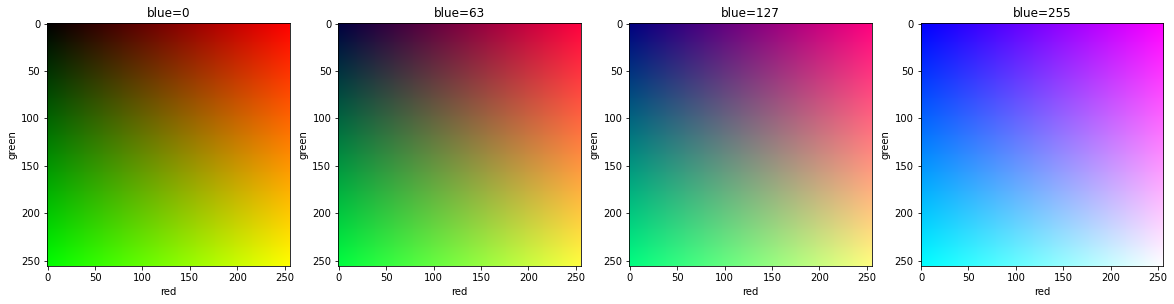

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import numpy.matlib as matlib
img = np.zeros((256,256,3),dtype=np.uint8) #宣告一個256x256x3的影像
img[:,:,1] = matlib.repmat(np.arange(256).reshape(256,1),1,256)
img[:,:,2] = img[:,:,1].transpose([1,0])
plt.figure(figsize=(20,5))
for idx,b in enumerate([0,63,127,255]):
    img[:,:,0] = b
    plt.subplot(1,4,idx+1)
    plt.imshow(img[:,:,[2,1,0]])
    plt.xlabel('red')
    plt.ylabel('green')
    plt.title('blue='+str(b))
plt.show()

### <span style="color:blue;background-color:#ffd0d0">練習</span>
<div style="background-color:#ffd0d0">
修改下面例子，讓他只顯示白球
</div>

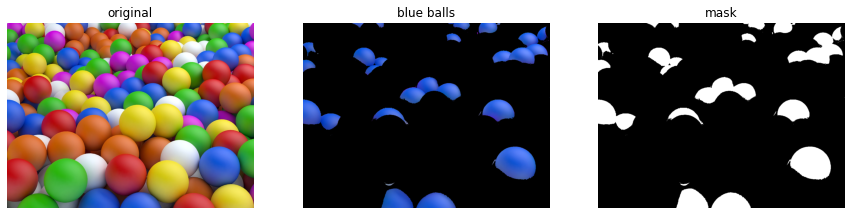

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

image = cv2.imread('./test_data/colorful_ball.jpg')
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.title('original')
plt.imshow(image[:,:,[2,1,0]])
plt.axis('off')

plt.subplot(1,3,2)
plt.title('blue balls')
#mask = (image[:,:,0]>=160) * (image[:,:,1]<=150) * (image[:,:,2]<=125)
#image[:,:,0] *=mask
#image[:,:,1] *=mask
#image[:,:,2] *=mask
mask = cv2.inRange(image,np.array([160,0,0]),np.array([255,150,125]))
image = cv2.bitwise_or(image,image,mask=mask)
plt.axis('off')
plt.imshow(image[:,:,[2,1,0]])

plt.subplot(1,3,3)
plt.title('mask')
plt.imshow(mask,cmap='gray')
plt.axis('off')
plt.show()

若想要找到每一個藍色球可以使用cv2.findContours。下面範例只顯示面積>=4000的區域，並對最大那個畫出其bounding box。

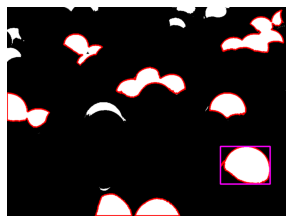

In [8]:
contours, hierarchy = cv2.findContours(mask,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
img = cv2.cvtColor(mask,cv2.COLOR_GRAY2BGR)
maxArea = 0
maxAreaID=0
for idx,aContour in enumerate(contours):
    a = cv2.contourArea(aContour)
    if a > maxArea:
        maxArea = a
        maxAreaID=idx
    if a >= 4000:
        cv2.drawContours(img,[aContour],0,(0,0,255),3)
x,y,w,h = cv2.boundingRect(contours[maxAreaID])
cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,255),3)
plt.figure(figsize=(5,5))
plt.imshow(img[:,:,[2,1,0]])
plt.axis('off')
plt.show()

可以使用數學型態學計算opening刪掉一些小塊，與藕斷絲連處。

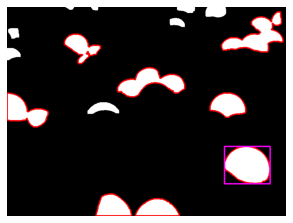

In [10]:
mask_opening = cv2.morphologyEx(mask, cv2.MORPH_OPEN, None, iterations=5)
contours, hierarchy = cv2.findContours(mask_opening,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
maxArea = 0
maxAreaID=0
img = cv2.cvtColor(mask_opening,cv2.COLOR_GRAY2BGR)
for idx,aContour in enumerate(contours):
    a = cv2.contourArea(aContour)
    if a > maxArea:
        maxArea = a
        maxAreaID=idx
    if a >= 4000:
        cv2.drawContours(img,[aContour],0,(0,0,255),3)
x,y,w,h = cv2.boundingRect(contours[maxAreaID])
cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,255),3)        
plt.figure(figsize=(5,5))
plt.imshow(img[:,:,[2,1,0]])
plt.axis('off')
plt.show()

### <span style="color:blue"> HSV色彩空間</span>
影像img為HSV這種影像格式，img有每個像素有三通道: img[y,x,0],img[y,x,1],img[y,x,2]分別表示像素第y列，第x行: H:色度,S:飽和度,V:亮度的值。轉到HSV色彩座標，有時候較容易標定目標顏色。

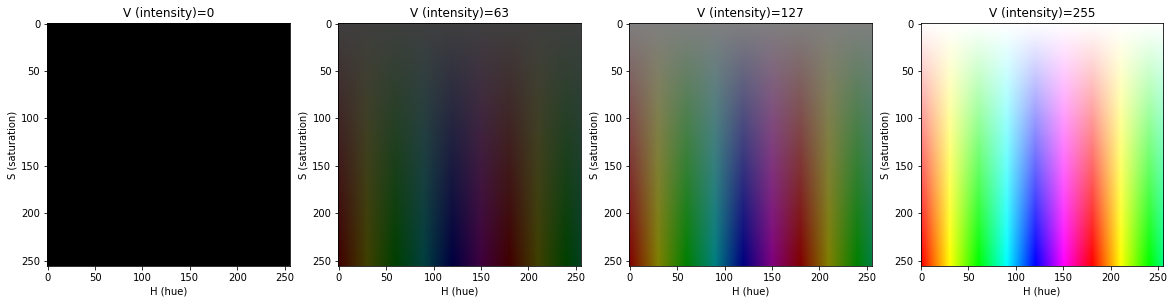

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import numpy.matlib as matlib
hsv_img = np.zeros((256,256,3),dtype=np.uint8) #宣告一個256x256x3的影像
hsv_img[:,:,1] = matlib.repmat(np.arange(256).reshape(256,1),1,256) # Saturation
hsv_img[:,:,0] = hsv_img[:,:,1].transpose([1,0]) # Hue
plt.figure(figsize=(20,5))
for idx,v in enumerate([0,63,127,255]):
    hsv_img[:,:,2] = v
    bgr_img = cv2.cvtColor(hsv_img,cv2.COLOR_HSV2BGR)
    plt.subplot(1,4,idx+1)
    plt.imshow(bgr_img[:,:,[2,1,0]])
    plt.xlabel('H (hue)')
    plt.ylabel('S (saturation)')
    plt.title('V (intensity)='+str(v))
plt.show()

下面例子示範轉到HSV色彩座標後的操作:<br>

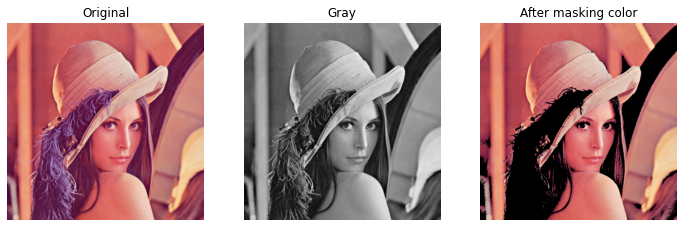

In [12]:
image = cv2.imread('./test_data/lenna.png')
gray  = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
hsv = cv2.cvtColor(image,cv2.COLOR_BGR2HSV)
mask1 = cv2.inRange(hsv,np.array([0,20,50]),np.array([40,255,255]))
mask2 = cv2.inRange(hsv,np.array([170,20,50]),np.array([255,255,255]))
mask  = cv2.bitwise_or(mask1,mask2)
mask_image = cv2.bitwise_and(image,image,mask=mask)

plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.imshow(image[:,:,[2,1,0]])
plt.axis('off')
plt.title('Original')

plt.subplot(1,3,2)
plt.imshow(gray,cmap='gray')
plt.axis('off')
plt.title('Gray')

plt.subplot(1,3,3)
plt.imshow(mask_image[:,:,[2,1,0]])
plt.axis('off')
plt.title('After masking color')
plt.show()

轉到HSV色彩座標後較容易改變影像飽和度

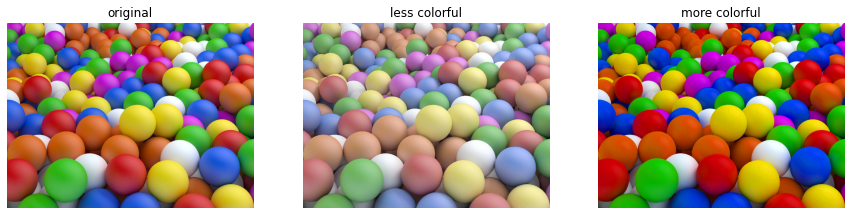

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

image = cv2.imread('./test_data/colorful_ball.jpg')
hsv = cv2.cvtColor(image,cv2.COLOR_BGR2HSV)
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.title('original')
plt.imshow(image[:,:,[2,1,0]])
plt.axis('off')

s = (hsv[:,:,1].astype(float)*0.5).astype(np.uint8)
hsv2= hsv.copy()
hsv2[:,:,1]=s
result_img = cv2.cvtColor(hsv2,cv2.COLOR_HSV2BGR)
plt.subplot(1,3,2)
plt.title('less colorful')
plt.imshow(result_img[:,:,[2,1,0]])
plt.axis('off')


s = (hsv[:,:,1].astype(float)*1.5)
s[s>255]=255
hsv2= hsv.copy()
hsv2[:,:,1]=s
result_img = cv2.cvtColor(hsv2,cv2.COLOR_HSV2BGR)
plt.subplot(1,3,3)
plt.title('more colorful')
plt.imshow(result_img[:,:,[2,1,0]])
plt.axis('off')
plt.show()

下面例子只改變藍色球成灰色或白色球。(blue hue:100~140)

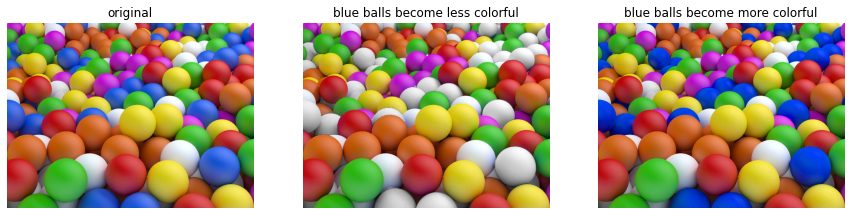

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

image = cv2.imread('./test_data/colorful_ball.jpg')
hsv = cv2.cvtColor(image,cv2.COLOR_BGR2HSV)
blue_mask = cv2.inRange(hsv,np.array([100,100,50]),np.array([140,255,255])).ravel().astype(np.bool)
 
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.title('original')
plt.imshow(image[:,:,[2,1,0]])
plt.axis('off')

s = hsv[:,:,1].astype(float).ravel()
s[blue_mask] *= 0.0
s = s.astype(np.uint8).reshape(image.shape[:2])
hsv2= hsv.copy()
hsv2[:,:,1]=s
result_img = cv2.cvtColor(hsv2,cv2.COLOR_HSV2BGR)
plt.subplot(1,3,2)
plt.title('blue balls become less colorful')
plt.imshow(result_img[:,:,[2,1,0]])
plt.axis('off')


s = hsv[:,:,1].astype(float).ravel()
s[blue_mask] *= 1.5
s[s>255]=255
hsv2= hsv.copy()
hsv2[:,:,1]=s.reshape(image.shape[0:2])
result_img = cv2.cvtColor(hsv2,cv2.COLOR_HSV2BGR)
plt.subplot(1,3,3)
plt.title('blue balls become more colorful')
plt.imshow(result_img[:,:,[2,1,0]])
plt.axis('off')
plt.show()

### <span style="color:blue;background-color:#ffd0d0">練習</span>
<div style="background-color:#ffd0d0">
使用視訊相機，鎖定膚色最大的那個區域。
</div>

In [15]:
import cv2

cap    = cv2.VideoCapture(0)
print('height:{} width:{}'.format(int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)),int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))))

while True:
    ret, frame = cap.read() 
    if ret==False:
        break
    
    hsv_img = cv2.cvtColor(frame,cv2.COLOR_BGR2HSV)
    #找出膚色範圍
    
    #再參考上面範例找出面積最大的膚色區
    
    cv2.imshow('camera',frame)
    key = cv2.waitKey(20) & 0xFF
    if key == 27:
        break
    
cap.release()
cv2.destroyAllWindows()

height:480 width:640


## <span style="color:blue">影像強化</span>
當影像對比不佳時，會看不清楚對比不佳處的內容。此時可以用影像強化技巧增加對比。下面為兩種常用的影像強化方式:
+ 直方圖等化法 (histogram equalization): 若是影像亮度都是集中在某些範圍，使得對比不佳。那麼直方圖等化法，可以用來調整影像亮度，讓亮度分布盡量均勻於所有可能的亮度值，藉此拉開亮度差距、提高對比。

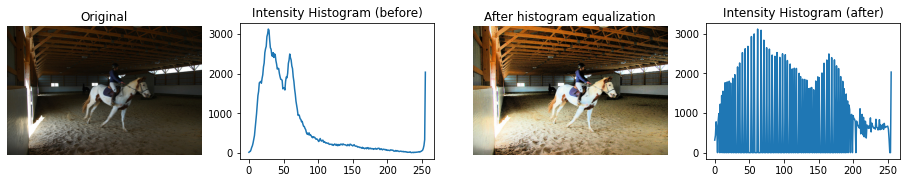

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
image = cv2.imread('./test_data/horse.jpg')
plt.figure(figsize=(16,2.5))
plt.subplot(1,4,1)
plt.imshow(image[:,:,[2,1,0]])
plt.title('Original')
plt.axis('off')


hsv_image = cv2.cvtColor(image,cv2.COLOR_BGR2HSV)
# show the intensity histogram
hist = np.histogram(hsv_image[:,:,2].ravel(),bins=256,range=[0,256]) # numpy's histogram
plt.subplot(1,4,2)
plt.plot(np.arange(256),hist[0])
plt.title('Intensity Histogram (before)')



hsv_image[:,:,2] = cv2.equalizeHist(hsv_image[:,:,2])
histEqualized_image = cv2.cvtColor(hsv_image,cv2.COLOR_HSV2BGR)
plt.subplot(1,4,3)
plt.imshow(histEqualized_image[:,:,[2,1,0]])
plt.title('After histogram equalization')
plt.axis('off')

# show the intensity histogram
hist = np.histogram(hsv_image[:,:,2].ravel(),bins=256,range=[0,256]) # numpy's histogram
plt.subplot(1,4,4)
plt.plot(np.arange(256),hist[0])
plt.title('Intensity Histogram (after)')

plt.show()

+ sharp-unshapr masking: 則是藉由拉大輪廓附近對比差距，來銳化影像。公式: $I'=I+k\times(I-I\otimes G(\sigma))$

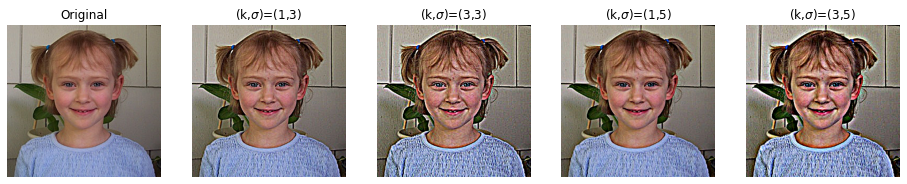

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def sharp_unsharp_masking(original,k,sigma):
    blur_image    = cv2.GaussianBlur(original,(0,0),sigma).astype(np.int)
    original      = original.astype(np.int)    
    sharpen_image = original+k*(original-blur_image)
    x = sharpen_image.ravel()
    x[x<0] = 0
    x[x>255]=255
    return sharpen_image.astype(np.uint8)

image = cv2.imread('./test_data/girl.png')

plt.figure(figsize=(16,4))
plt.subplot(1,5,1)
plt.imshow(image[:,:,[2,1,0]])
plt.title('Original')
plt.axis('off')

for idx,(k,sigma) in enumerate([(1,3),(3,3),(1,5),(3,5)]):
    sharpen_image = sharp_unsharp_masking(image,k,sigma)
    plt.subplot(1,5,2+idx)
    plt.imshow(sharpen_image[:,:,[2,1,0]])
    plt.title('(k,$\sigma$)=({},{})'.format(k,sigma))
    plt.axis('off')

plt.show()

### <span style="color:blue;background-color:#ffd0d0">練習</span>
<div style="background-color:#ffd0d0">
使用視訊相機，將每個畫面以sharp-unsharp masking銳化。
</div>